# Libraries

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Sourcing

In [7]:
loan = pd.read_csv('data/loan.csv')
data_dict = pd.read_excel('data/Data_Dictionary.xlsx')

In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
print(loan.shape)
loan.info()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning

In [10]:
print(f'Empty rows: {loan.isnull().all(axis=1).sum()}')
print(f'Empty columns: {loan.isnull().all(axis=0).sum()}')

Empty rows: 0
Empty columns: 54


> There are 54 Variables which have only null values we can drop them as they're of no use.

In [11]:
cols_with_null = loan.isnull().all(axis=0).to_frame().reset_index()
cols_with_null.columns = ['Variable','null_status']
cols_with_null = cols_with_null[cols_with_null['null_status']==True]
loan.drop(cols_with_null['Variable'],axis=1,inplace=True)

> Checking the variance of the variable

In [12]:
loan_variance = loan.var().to_frame().reset_index()
loan_variance.columns = ['Variable','Variance']
loan_variance['Variance'] = loan_variance['Variance'].astype('int')
loan_variance

,Variable,Variance
0,id,44392017644
1,member_id,70584963034
2,loan_amnt,55601937
3,funded_amnt,51656399
4,funded_amnt_inv,50814805
5,installment,43628
6,annual_inc,4069644553
7,dti,44
8,delinq_2yrs,0
9,inq_last_6mths,1


> dropping the columns with 0 variance of the columns having continous values.

In [13]:
loan.drop(loan_variance[loan_variance['Variance']==0]['Variable'],axis=1,inplace=True)

> Creating a table for Columns Details reference

In [14]:
cols_info = loan.isna().any(axis=0).to_frame().reset_index()
cols_info.columns = ['Variable','null_status']
data_dict.rename(columns={'LoanStatNew':'Variable'},inplace=True)
cols_info = cols_info.merge(data_dict, on='Variable', how='left')
cols_info

,Variable,null_status,Description
0,id,False,A unique LC assigned ID for the loan listing.
1,member_id,False,A unique LC assigned Id for the borrower member.
2,loan_amnt,False,The listed amount of the loan applied for by t...
3,funded_amnt,False,The total amount committed to that loan at tha...
4,funded_amnt_inv,False,The total amount committed by investors for th...
5,term,False,The number of payments on the loan. Values are...
6,int_rate,False,Interest Rate on the loan
7,installment,False,The monthly payment owed by the borrower if th...
8,grade,False,LC assigned loan grade
9,sub_grade,False,LC assigned loan subgrade


In [15]:
loan['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [16]:
# list(cols_info[cols_info['Variable']=='revol_util']['Description'])

#### There are several columns that won't be taken as an active variable hence removing the same:
- Columns like `id`, `member_id`, `url`, `zip_code`, `mths_since_last_delinq`, `mths_since_last_record`, `last_pymnt_d`,  `next_pymnt_d`, `last_credit_pull_d` are not related to the current problem statement.
- There are several columns that have same values hence 0 variance, namely `pymnt_plan`, `application_type`, `initial_list_status`.
- We can get something using `revol_util` hence remiving `revol_bal`.
- For fund related details taking `funded_amnt` and `total_pymnt` as base and removing other columns related to funds.
- `purpose` and `title` columns seems to have same kind of information. hence dropping `title` column.

In [17]:
loan_df = loan.drop(['id','member_id','loan_amnt','funded_amnt_inv','pymnt_plan','url','desc',
'zip_code','earliest_cr_line','mths_since_last_delinq','mths_since_last_record',
'revol_bal','initial_list_status','out_prncp','out_prncp_inv','total_pymnt_inv',
'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d'
,'last_credit_pull_d','application_type','title'], axis=1)

In [18]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_title            37258 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

> Analysing on the basis of **Employment Job Title**.

In [19]:
loan_df['emp_title'].nunique()

28820

In [20]:
emp_df = loan_df[loan_df['loan_status']=='Charged Off']['emp_title'].value_counts().to_frame().reset_index()
emp_df.columns = ['emp_title','count']
print(emp_df.shape)
emp_df.head()

(4636, 2)


,emp_title,count
0,Bank of America,20
1,US Army,18
2,Walmart,14
3,UPS,12
4,AT&T,12


> We have `28820` unique Titles out of which `4636` tends to go **Charged Off** .

> `Bank of America`, `US Army`, `Walmart`, `UPS` and `AT&T` are at the top 5 respectively.

> Dropping `emp_title` as it won't give any other insight. 

In [21]:
loan_df.drop('emp_title',axis=1,inplace=True)

> Checking Missing Values

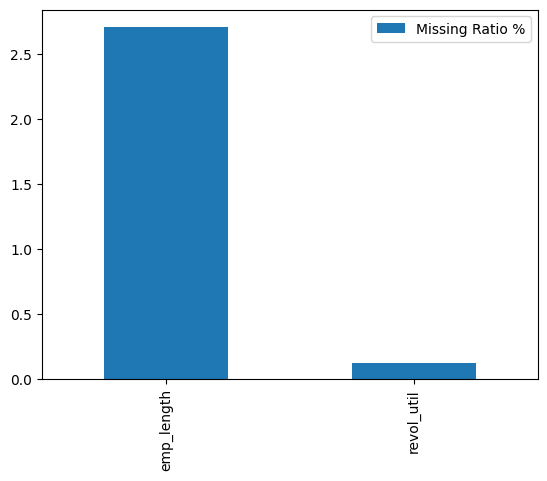

In [22]:
na_df = loan_df.isna().sum()/loan_df.shape[0] * 100
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
missing_data.plot(kind = "bar")
plt.show()

> for missing values of emp_length checked with multiple matrix (i.e., `loan_status`, `verification_status` and `home_ownership`) **10+ years** is the maximum occuring value hence replacing the missing values with the same.

In [23]:
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0],inplace=True)

> checking the missing values for `revol_util`.

In [24]:
loan_df[(loan_df['revol_util'].isna()) & (loan_df['loan_status']=='Charged Off')].shape[0] / loan_df[loan_df['loan_status']=='Charged Off'].shape[0] * 100

0.28434334458859073

> 0.28 % of total **Charged Off** value are missing. We can drop the rows where values in `revol_util` are missing.

In [25]:
loan_df.dropna(subset='revol_util',inplace=True)

> Cleaning the data

In [26]:
loan_df['term'] = loan_df['term'].apply(lambda x: x.replace(' months',''))
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: x.replace('%',''))
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: x.replace('%',''))

# Univariate Data Analysis

<AxesSubplot: xlabel='funded_amnt', ylabel='Density'>

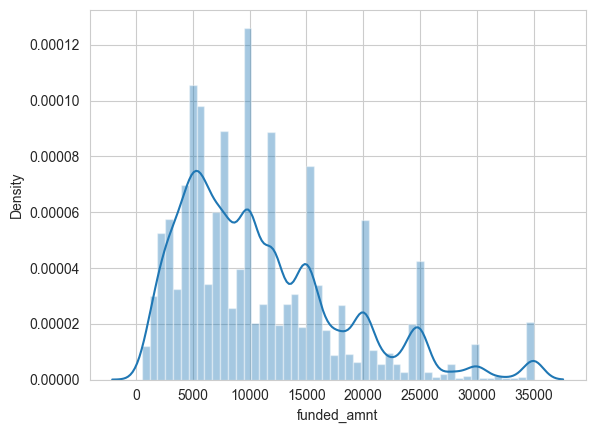

In [27]:
sns.set_style('whitegrid')
sns.distplot(loan_df['funded_amnt'])

In [28]:
loan_df['int_rate'] = loan_df['int_rate'].astype('float')

<AxesSubplot: >

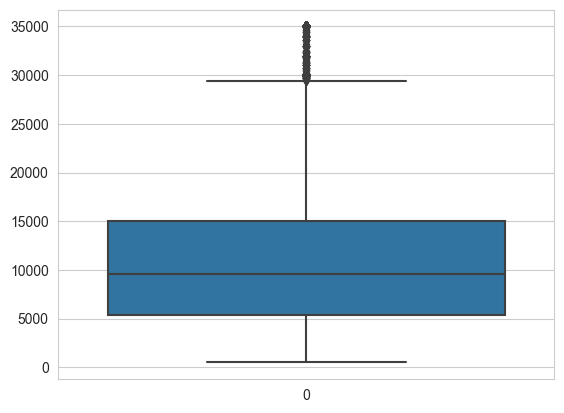

In [29]:
sns.boxplot(loan_df['funded_amnt'])

In [30]:
loan_df['funded_amnt'].describe()

count    39667.000000
mean     10955.590919
std       7187.135178
min        500.000000
25%       5400.000000
50%       9625.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

> the average amount taken is `10956` but the median is `9625`. hence the data is tends to be right skewed.. means we have a very less number of customers that took loan of amount more than `29000`.

 36    73.232158
 60    26.767842
Name: term, dtype: float64


<AxesSubplot: xlabel='term', ylabel='count'>

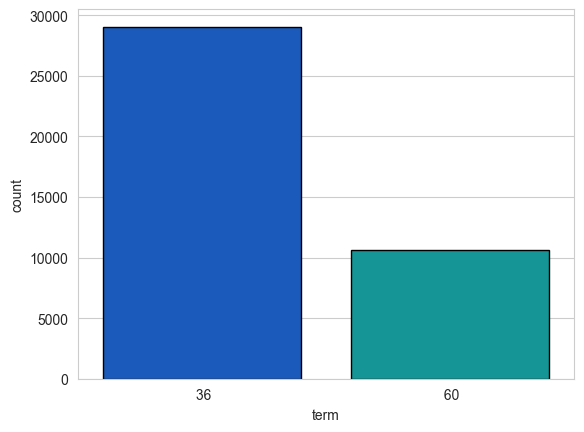

In [31]:
print(loan_df['term'].value_counts() / loan_df.shape[0] * 100)
sns.countplot(x = 'term', data=loan_df, palette='winter', edgecolor = 'black')

>There are only two term of amount in the dataset i.e., 36 and 60 months.

>Out of which 73.23 percentage had 36 months of term

In [32]:
loan_df['int_rate'] = loan_df['int_rate'].astype('float')

<AxesSubplot: xlabel='int_rate', ylabel='Density'>

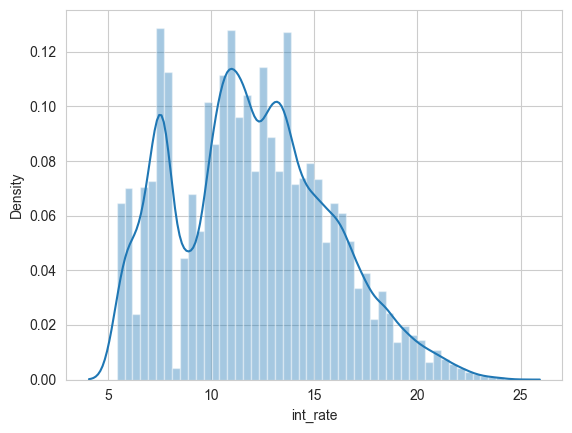

In [33]:
sns.set_style('whitegrid')
sns.distplot(loan_df['int_rate'])

<AxesSubplot: >

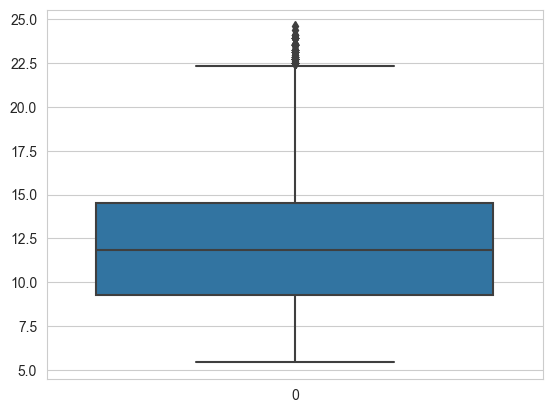

In [34]:
sns.boxplot(loan_df['int_rate'])

In [35]:
loan_df['int_rate'].describe()

count    39667.000000
mean        12.016587
std          3.723856
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

In [36]:
loan_df[loan_df['int_rate']>22].shape[0] / loan_df.shape[0] * 100

0.4689036226586331

> 0.46% of the customers have interest rate more the 22%.

<AxesSubplot: xlabel='emp_length', ylabel='count'>

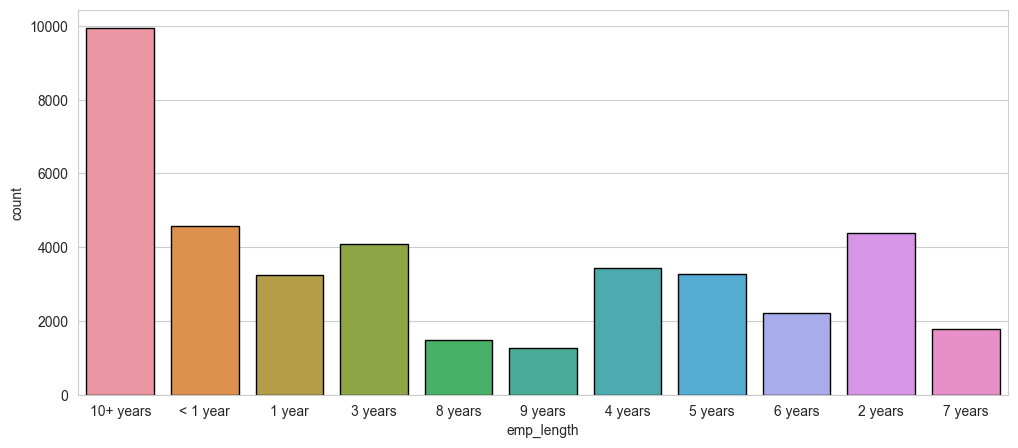

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=loan_df, edgecolor='black')

> Majority of people have more than 10 years of working experience.

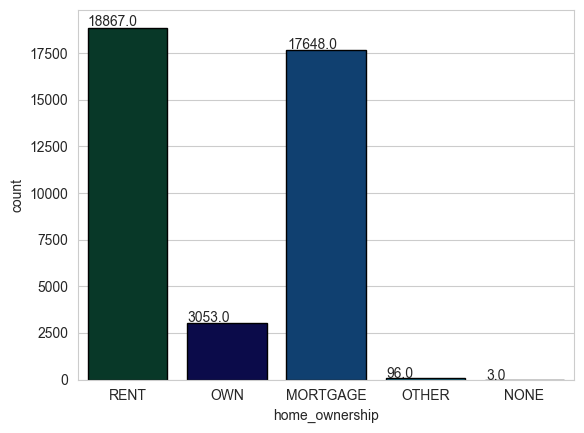

In [38]:
ax = sns.countplot(x='home_ownership',data=loan_df, edgecolor='black', palette='ocean')
for p in ax.patches: ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

> maximum people who took loan were living in a rented place or in mortgage.

In [39]:
loan_df['annual_inc'].describe()

count    3.966700e+04
mean     6.899952e+04
std      6.378947e+04
min      4.000000e+03
25%      4.051632e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot: xlabel='annual_inc', ylabel='Count'>

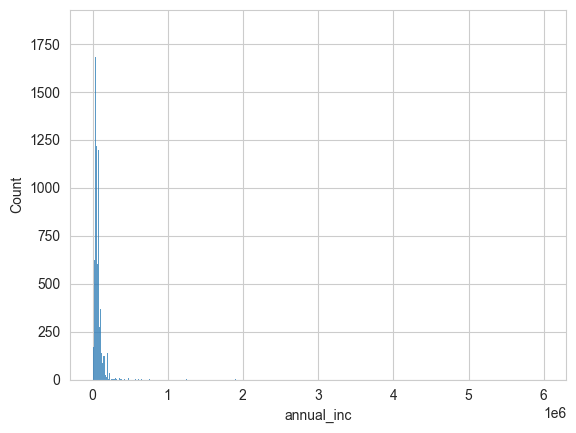

In [40]:
sns.set_style('whitegrid')
sns.histplot(loan_df['annual_inc'])

<AxesSubplot: xlabel='annual_inc'>

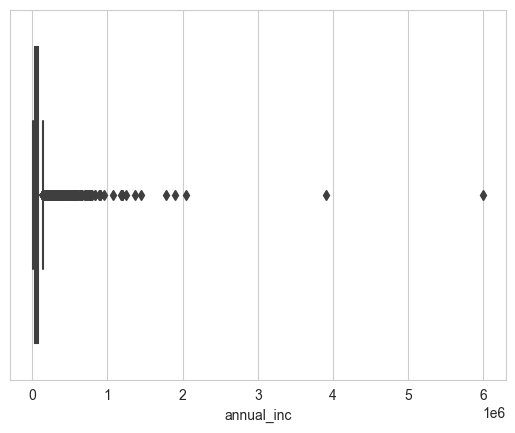

In [41]:
sns.boxplot(x=loan_df['annual_inc'])

In [42]:
loan_df['annual_inc'].max()

6000000.0

In [43]:
loan_df[loan_df['annual_inc']<100000].shape[0] / loan_df.shape[0] * 100

84.37744220636802

> There are only 5 customers whose annual income is greater than 15 lakhs and only 2 customers whose annual income is greater than 30 lakhs.

> 84.4% of customer's annual income is less than 1 lakh.


<AxesSubplot: xlabel='verification_status', ylabel='count'>

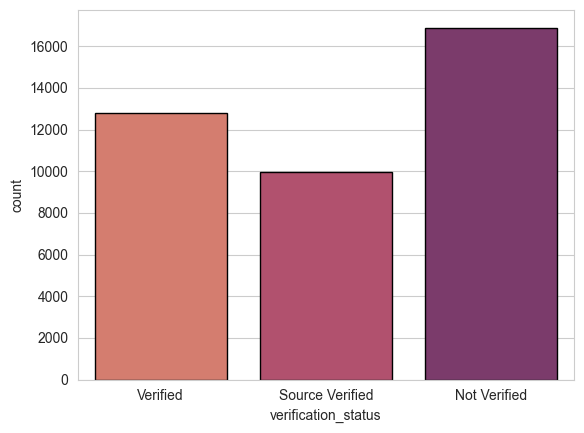

In [44]:
sns.set_style('whitegrid')
sns.countplot(x = 'verification_status',data=loan_df, palette='flare', edgecolor = 'black')

In [45]:
loan_df[loan_df['verification_status']=='Not Verified'].shape[0] / loan_df.shape[0] * 100

42.584516096503386

> 42.6% of the total customers were not verified.

Fully Paid     82.980815
Charged Off    14.145259
Current         2.873925
Name: loan_status, dtype: float64


<AxesSubplot: xlabel='loan_status', ylabel='count'>

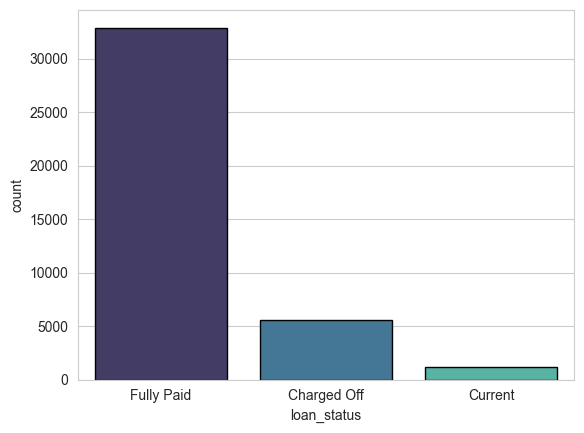

In [46]:
print(loan_df['loan_status'].value_counts() / loan_df.shape[0] * 100)
sns.set_style('whitegrid')
sns.countplot(x = 'loan_status',data=loan_df, palette='mako', edgecolor = 'black')

> Majority of population have Fully Paid the loan. 2.89% of the customers are still going on with the loan and 14.14% are Charged Off.

<AxesSubplot: xlabel='purpose', ylabel='count'>

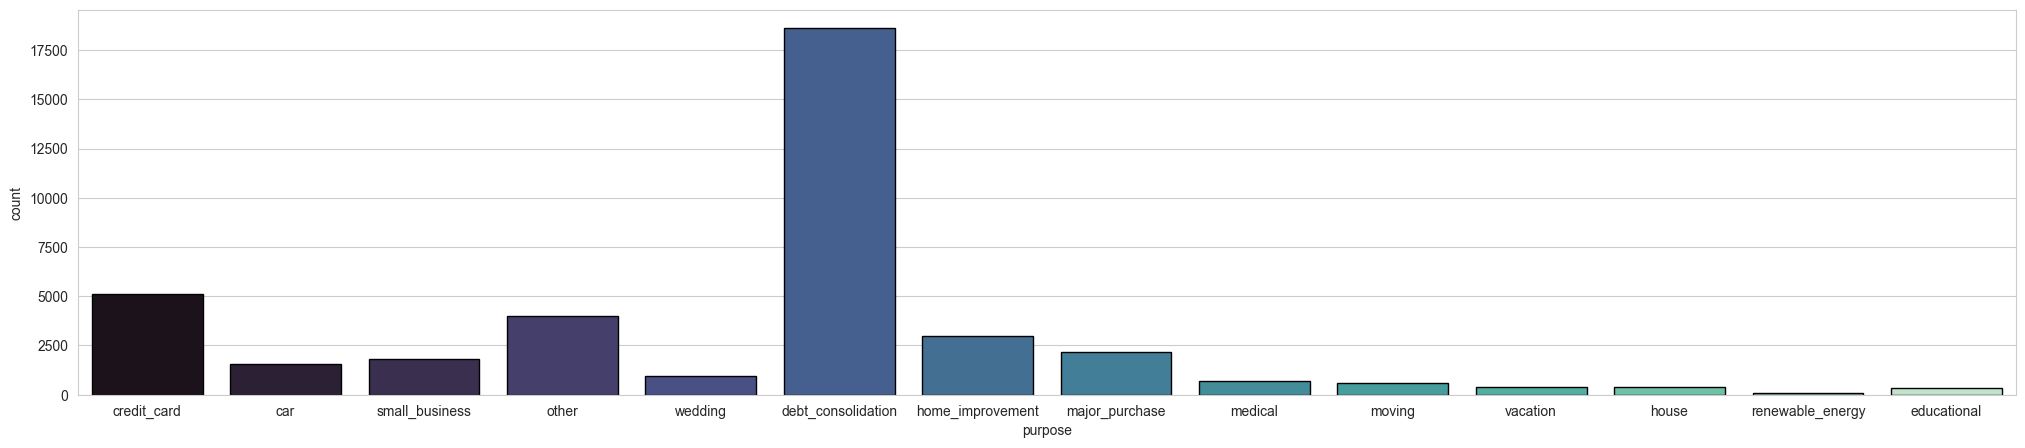

In [47]:
plt.figure(figsize=(25,5))
sns.set_style('whitegrid')
sns.countplot(x = 'purpose',data=loan_df, palette='mako', edgecolor = 'black')

> majority of customer have stated debt consolidation as the reason to take the loan.

In [48]:
loan_df[loan_df['annual_inc']>1500000]

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
7247,12025,36,14.27,412.57,C,C2,10+ years,RENT,1782000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,NY,1.31,0,9,85.70,30,14847.436820
23551,1500,36,6.17,45.75,A,A3,5 years,MORTGAGE,1900000.0,Source Verified,Nov-10,Fully Paid,credit_card,TX,0.57,2,17,59.60,36,1562.352995
29639,15500,60,10.62,334.08,B,B3,3 years,MORTGAGE,3900000.0,Not Verified,Jun-10,Fully Paid,home_improvement,NM,0.20,3,12,10.20,32,20044.620000
30107,5000,36,12.73,167.84,C,C1,10+ years,MORTGAGE,6000000.0,Source Verified,May-10,Fully Paid,home_improvement,CA,0.01,1,2,37.70,10,5514.493060
39089,8450,36,12.29,281.84,C,C5,< 1 year,RENT,2039784.0,Not Verified,Mar-08,Fully Paid,debt_consolidation,FL,0.13,1,7,51.80,11,10145.923230


<AxesSubplot: xlabel='addr_state', ylabel='count'>

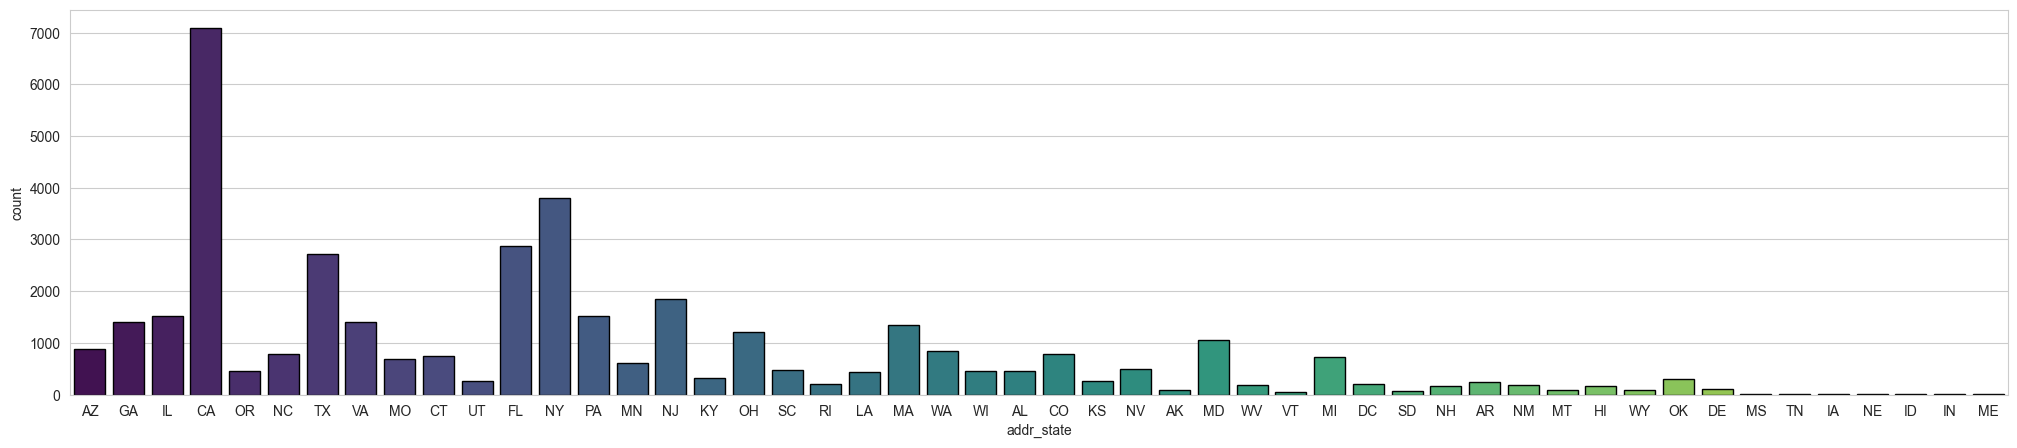

In [49]:
plt.figure(figsize=(25,5))
sns.set_style('whitegrid')
sns.countplot(x = 'addr_state',data=loan_df, palette='viridis', edgecolor = 'black')

In [50]:
loan_df[loan_df['addr_state']=='CA'].shape[0] / loan_df.shape[0] * 100

17.878841354274332

> majority of customers i.e, 17.88% of the total population who took loan are from CA state.

<AxesSubplot: xlabel='dti', ylabel='Density'>

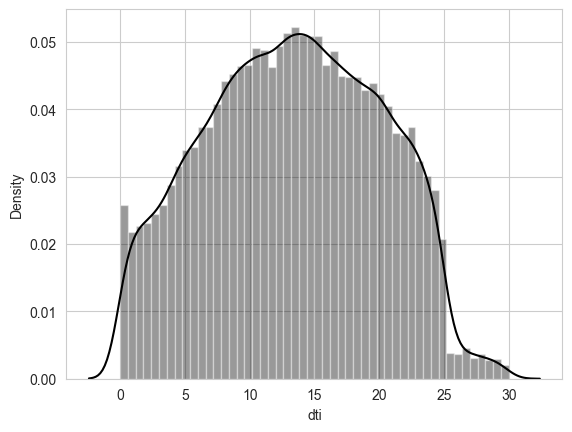

In [51]:
sns.set_style('whitegrid')
sns.distplot(loan_df['dti'],color='black')

<AxesSubplot: >

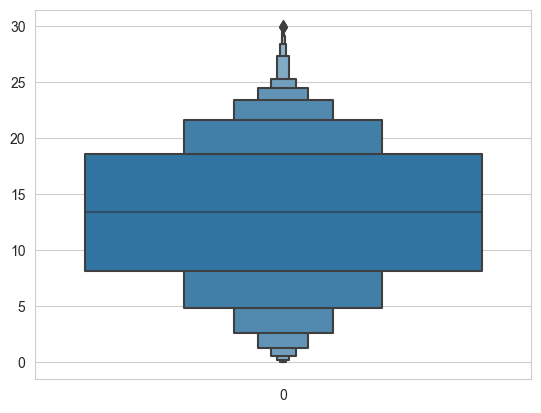

In [52]:
sns.boxenplot(loan_df['dti'])

In [53]:
loan_df['dti'].describe()

count    39667.000000
mean        13.318704
std          6.676975
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

> Average debt-to-income ratio is 13.3

In [54]:
loan_df['revol_util'] = loan_df['revol_util'].astype('float')

<AxesSubplot: xlabel='revol_util', ylabel='Density'>

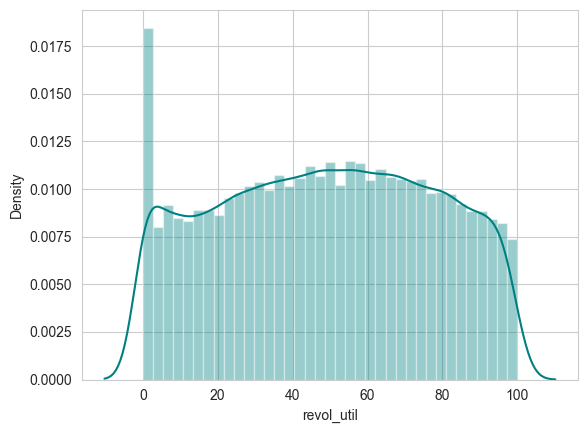

In [55]:
sns.set_style('whitegrid')
sns.distplot(loan_df['revol_util'],color='teal')

In [56]:
loan_df['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [57]:
loan_df[loan_df['revol_util']>90].shape[0] / loan_df.shape[0] * 100

7.983966521289737

> around 8% of the total population have Revolving line utilization rate more than 90

B    30.299745
A    25.424156
C    20.379661
D    13.338543
E     7.136915
F     2.629390
G     0.791590
Name: grade, dtype: float64


<AxesSubplot: xlabel='grade', ylabel='count'>

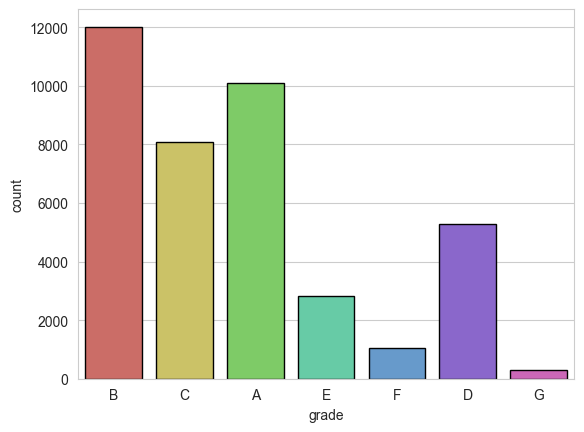

In [58]:
print(loan_df['grade'].value_counts() / loan_df.shape[0] * 100)
sns.set_style('whitegrid')
sns.countplot(x = 'grade',data=loan_df, palette='hls', edgecolor = 'black')

> 30% of the customers have grade B

# Feature Engineering and Multivariate Analysis

### Feature Engineering

In [59]:
loan_df['p&l'] = loan_df['total_pymnt'] - loan_df['funded_amnt']

In [60]:
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: '20'+x[-2:])

In [61]:
loan_df['open_total_acc'] = round(loan_df['open_acc'] / loan_df['total_acc'] * 100,2)

In [62]:
def annual_income_segment(income):
    if income<=100000: return '<=1L'
    elif income>100000 and income<=500000: return '>1L,<=5L'
    elif income>500000 and income<=1000000: return '>5L,<=10L'
    elif income>1000000 and income<=1500000: return '>10L,<=15L'
    else : return '>15L'

loan_df['annual_inc_seg'] = loan_df['annual_inc'].apply(lambda x: annual_income_segment(x))

### Multivariate Analysis

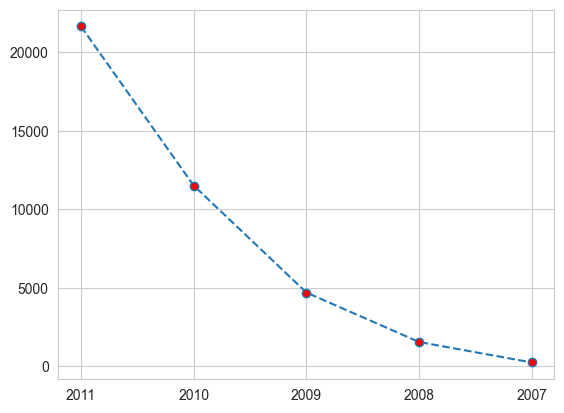

In [63]:
plt.plot(loan_df['issue_year'].value_counts(),'o--' , mfc = 'r')

> more than 21600 loans were issued in 2011

<AxesSubplot: xlabel='emp_length', ylabel='count'>

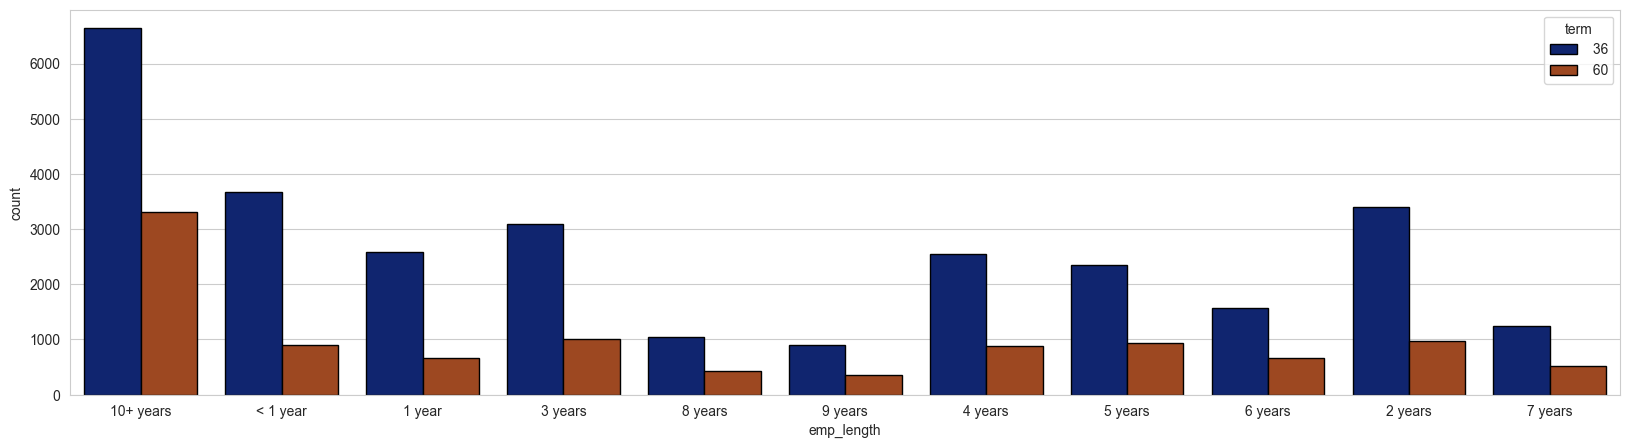

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length',hue='term', data=loan_df, edgecolor='black', palette='dark')

<AxesSubplot: xlabel='emp_length', ylabel='count'>

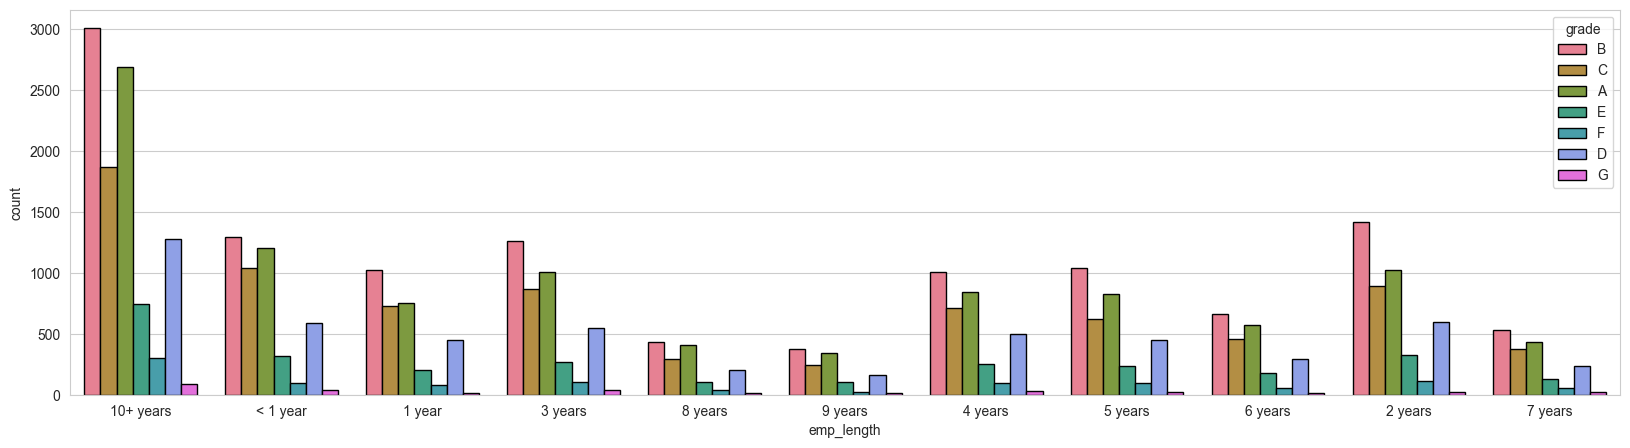

In [65]:
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length',hue='grade', data=loan_df, edgecolor='black', palette='husl')

<AxesSubplot: xlabel='emp_length', ylabel='count'>

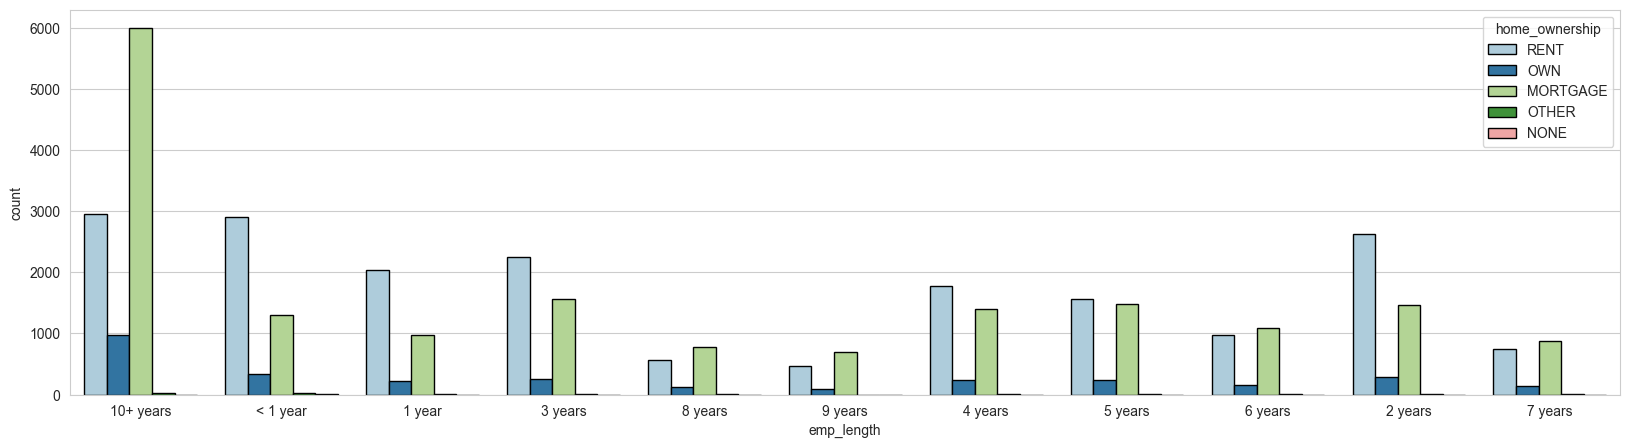

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length',hue='home_ownership', data=loan_df, edgecolor='black', palette='Paired')

<AxesSubplot: xlabel='emp_length', ylabel='count'>

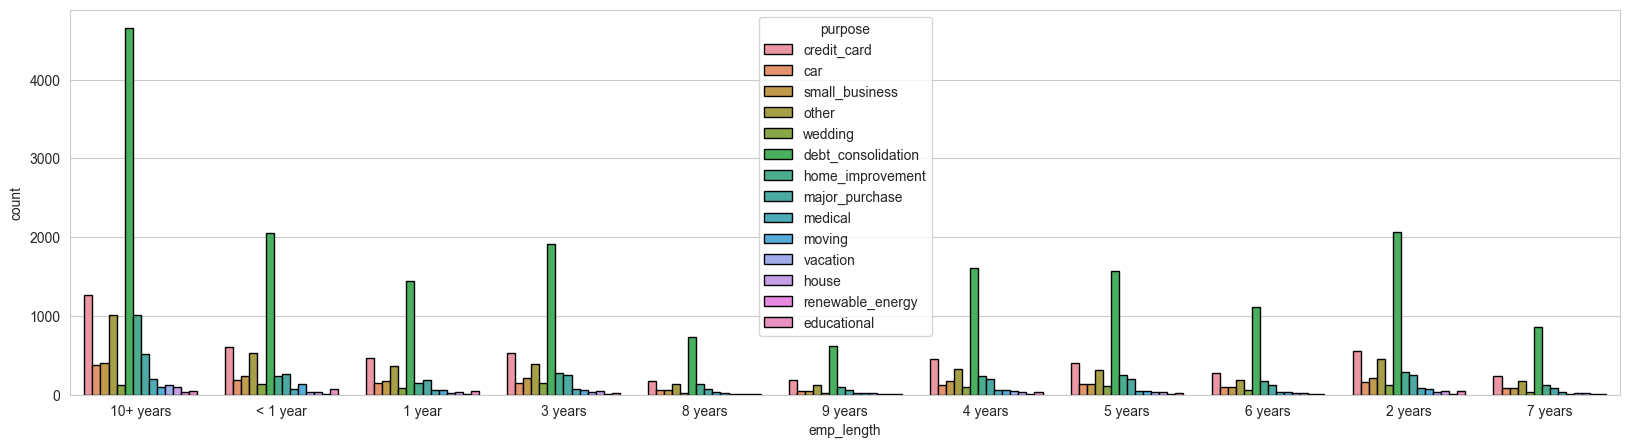

In [67]:
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length',hue='purpose', data=loan_df, edgecolor='black')

<AxesSubplot: xlabel='emp_length', ylabel='count'>

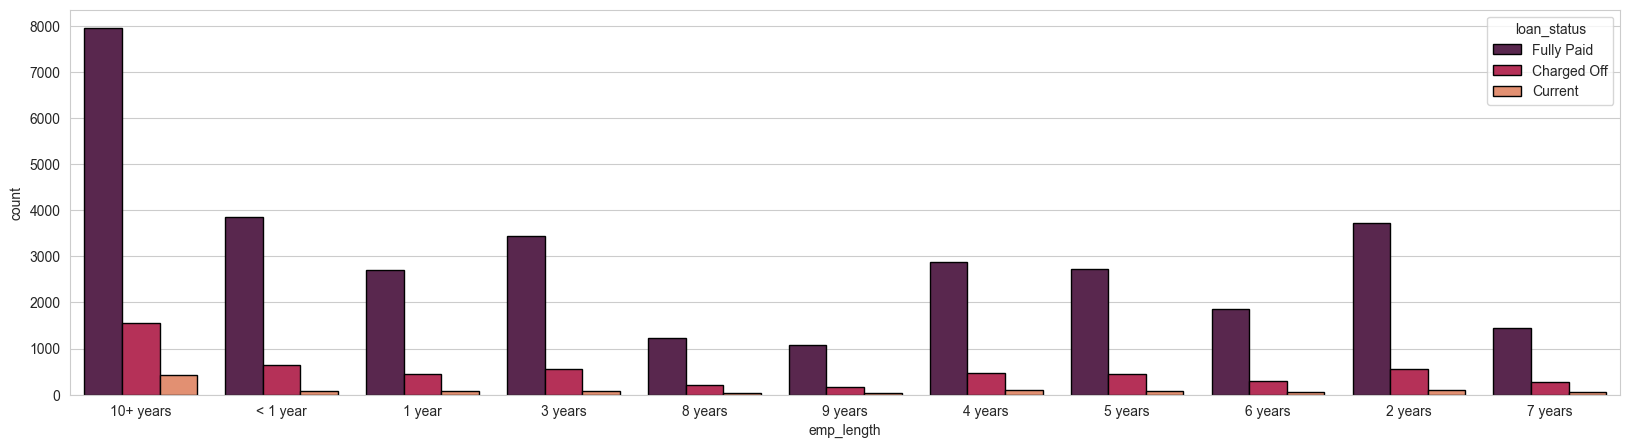

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length',hue='loan_status', data=loan_df, edgecolor='black', palette='rocket')

> Customer who have more than 10 years of experience have the highest number of mortgage

> debt_consolidation is almost equal on the base of employment length as purpose for the loan.

<AxesSubplot: xlabel='home_ownership', ylabel='count'>

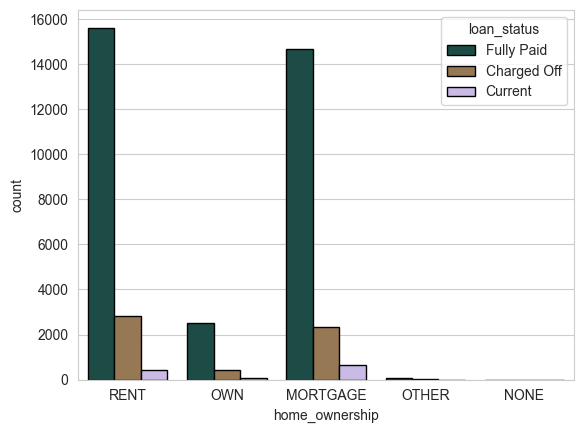

In [69]:
sns.countplot(x='home_ownership',hue='loan_status', data=loan_df, edgecolor='black', palette='cubehelix')

> people living in rent are mostly charged-off followed by people living in mortgage

<AxesSubplot: xlabel='home_ownership', ylabel='count'>

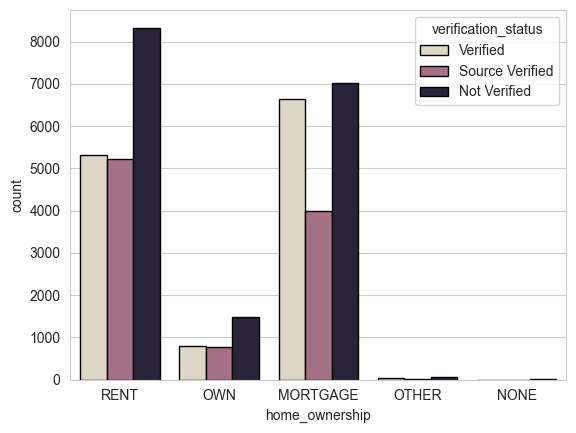

In [70]:
sns.countplot(x='home_ownership',hue='verification_status', data=loan_df, edgecolor='black', palette='ch:s=-.2,r=.6')

<AxesSubplot: xlabel='home_ownership', ylabel='count'>

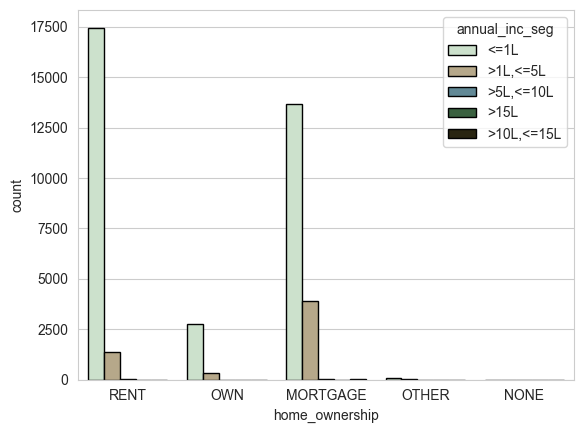

In [71]:
sns.countplot(x='home_ownership',hue='annual_inc_seg', data=loan_df, edgecolor='black', palette='ch:s=-100.5,r=-100.9')

> annual income of maximum people living on Rent and Mortgage is less than 1 Lakh.

<AxesSubplot: xlabel='addr_state', ylabel='count'>

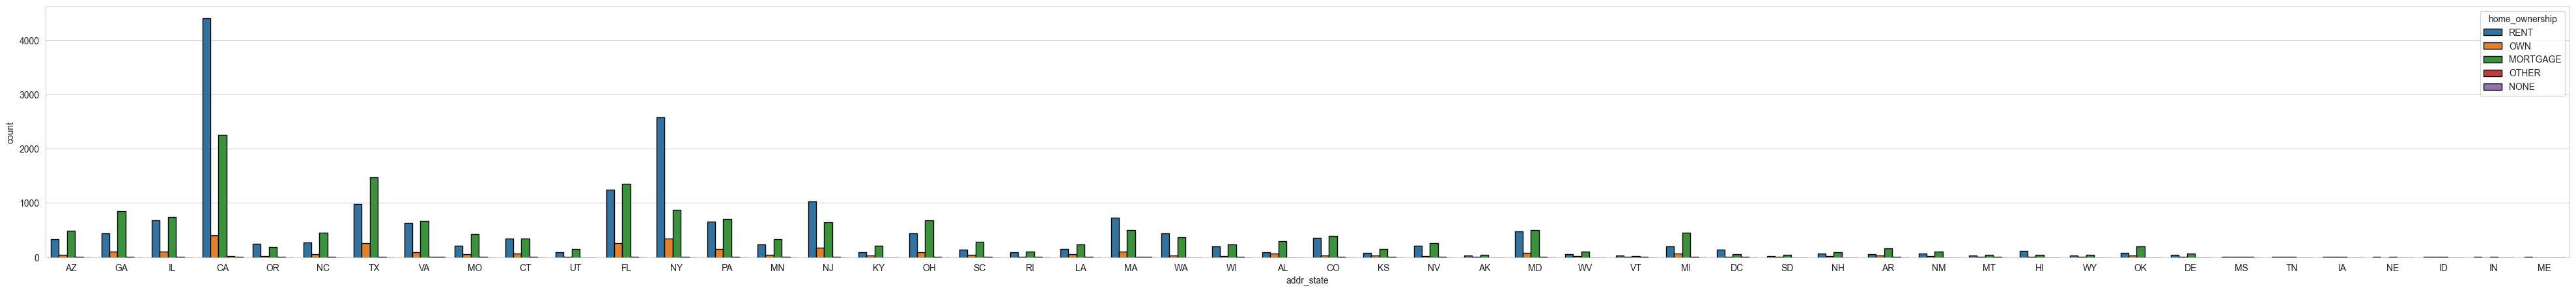

In [72]:
plt.figure(figsize=(50,5))
sns.countplot(x='addr_state',hue='home_ownership', data=loan_df, edgecolor='black')

<AxesSubplot: xlabel='addr_state', ylabel='count'>

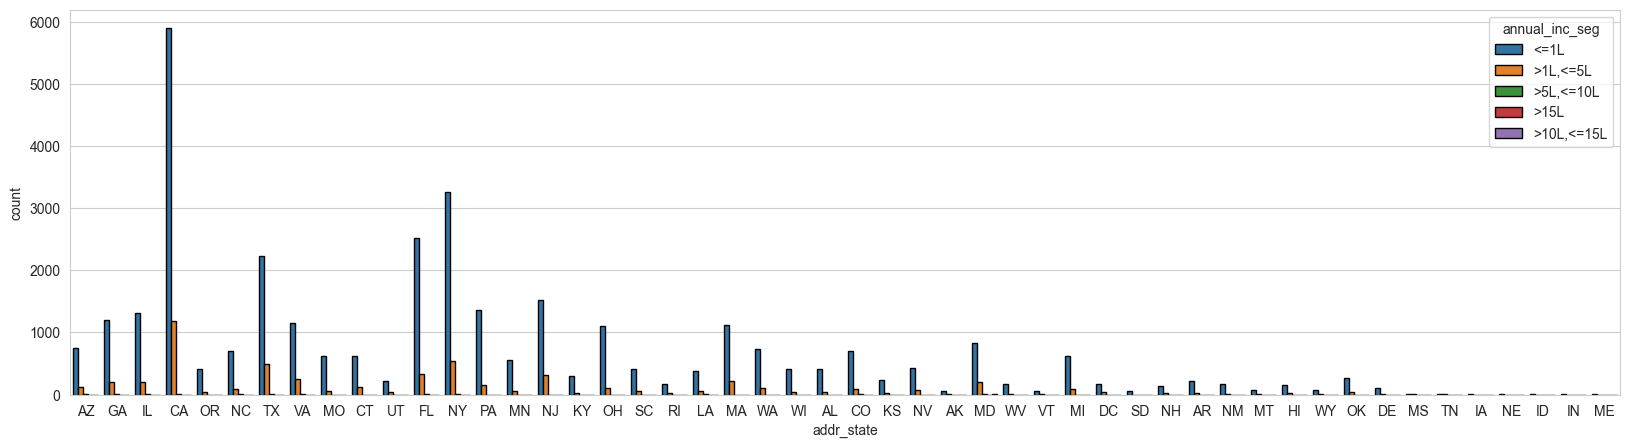

In [73]:
plt.figure(figsize=(20,5))
sns.countplot(x='addr_state',hue='annual_inc_seg', data=loan_df, edgecolor='black')

<AxesSubplot: xlabel='emp_length', ylabel='count'>

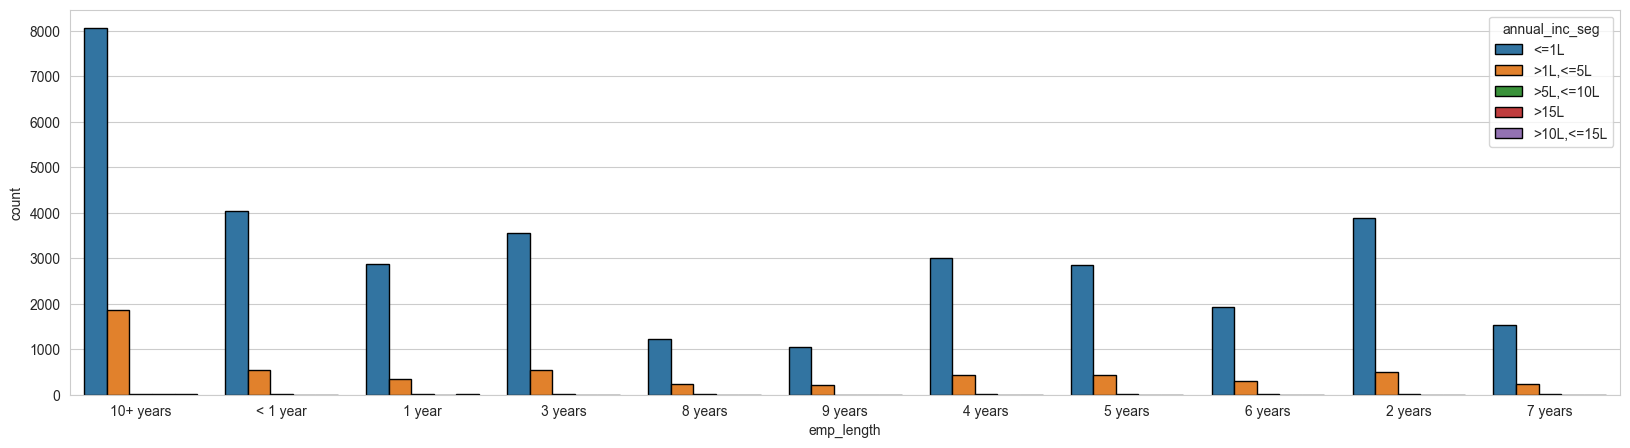

In [74]:
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length',hue='annual_inc_seg', data=loan_df, edgecolor='black')

<AxesSubplot: xlabel='verification_status', ylabel='count'>

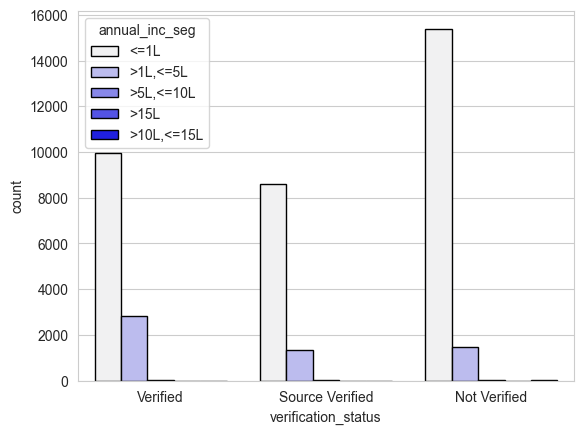

In [75]:
sns.countplot(x='verification_status',hue='annual_inc_seg', data=loan_df, edgecolor='black',palette='light:b')

<AxesSubplot: xlabel='purpose', ylabel='count'>

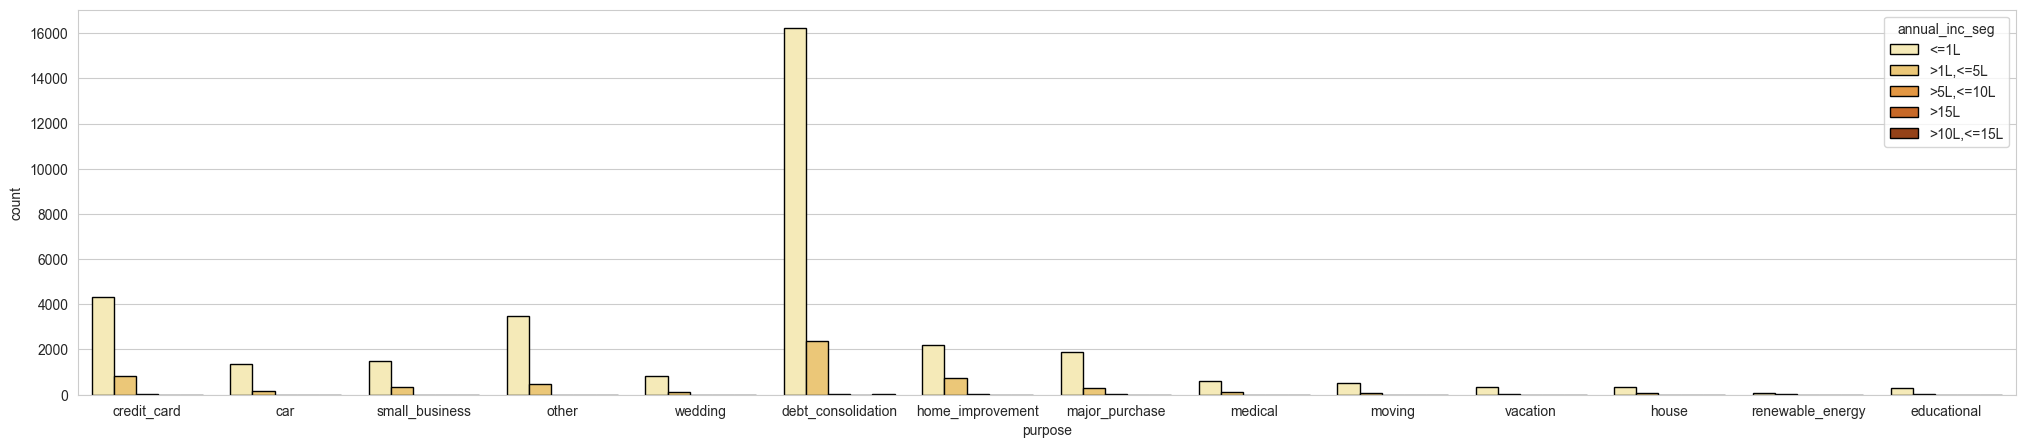

In [76]:
plt.figure(figsize=(25,5))
sns.countplot(x='purpose',hue='annual_inc_seg', data=loan_df, edgecolor='black',palette='YlOrBr')

<AxesSubplot: xlabel='issue_year', ylabel='count'>

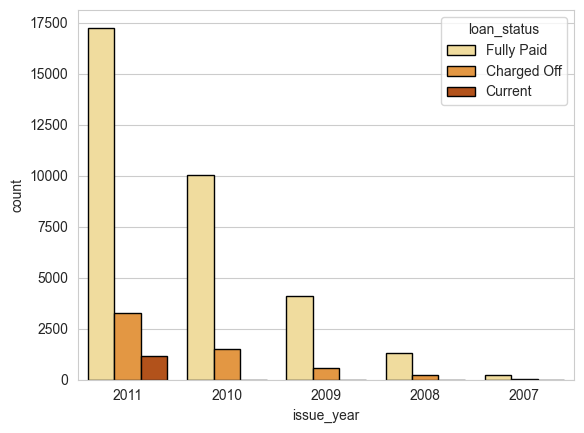

In [77]:
sns.countplot(x='issue_year',hue='loan_status', data=loan_df, edgecolor='black',palette='YlOrBr')

> most of the Charged Off cases were reported in 2011

# Analysing the factors that shows that the customer is likely to get defaulted!

> removing the records having Loan Status as `Current`

In [78]:
loan_df1 = loan_df[loan_df['loan_status']!='Current']

In [79]:
loan_df1.shape

(38527, 24)

Fully Paid     85.436188
Charged Off    14.563812
Name: loan_status, dtype: float64


<AxesSubplot: xlabel='loan_status', ylabel='count'>

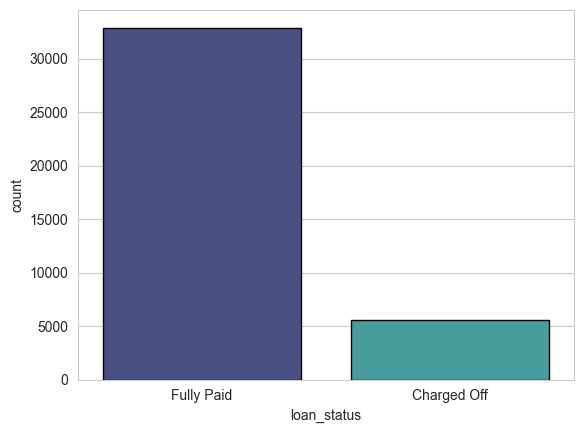

In [80]:
print(loan_df1['loan_status'].value_counts() / loan_df1.shape[0] * 100)
sns.set_style('whitegrid')
sns.countplot(x = 'loan_status',data=loan_df1, palette='mako', edgecolor = 'black')

<AxesSubplot: xlabel='loan_status', ylabel='count'>

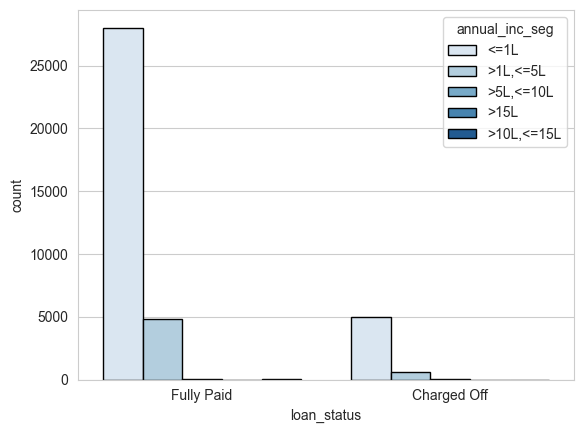

In [81]:
sns.countplot(x='loan_status',hue='annual_inc_seg', data=loan_df1, edgecolor='black', palette='Blues')

In [82]:
loan_df1[(loan_df1['loan_status']=='Charged Off') & (loan_df1['annual_inc_seg']=='<=1L')].shape[0] / loan_df1[loan_df1['loan_status']=='Charged Off'].shape[0] * 100

89.44929602566387

> 85.45% of the total `Charged Off` customers have annual income less than 1 Lakh.

<AxesSubplot: xlabel='loan_status', ylabel='count'>

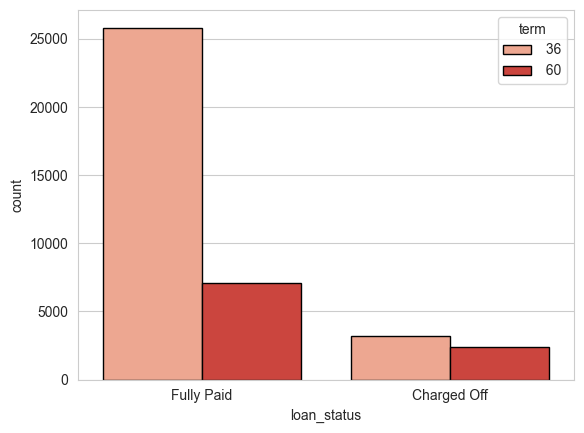

In [83]:
sns.countplot(x='loan_status',hue='term', data=loan_df1, edgecolor='black', palette='Reds')

<AxesSubplot: xlabel='loan_status', ylabel='count'>

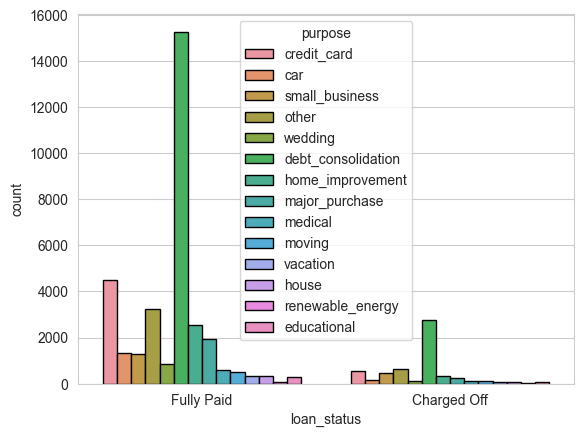

In [84]:
sns.countplot(x='loan_status',hue='purpose', data=loan_df1, edgecolor='black')

In [85]:
loan_df1[(loan_df1['loan_status']=='Charged Off') & (loan_df1['purpose']=='debt_consolidation')].shape[0] / loan_df1[loan_df1['loan_status']=='Charged Off'].shape[0] * 100

49.224737123507396

> 49.22% of the total customers who went Charged Off have stated the purpose for the loan as Debt Consolidation

<AxesSubplot: xlabel='loan_status', ylabel='count'>

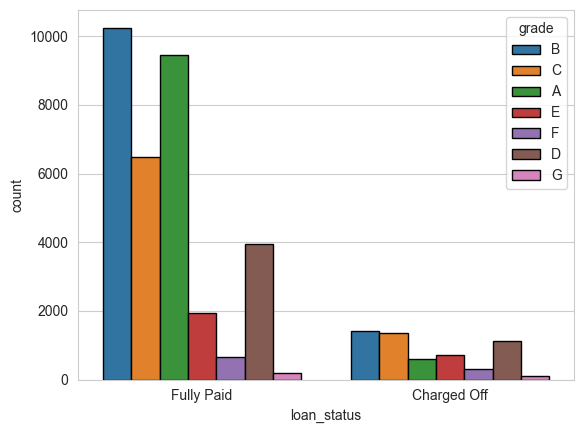

In [86]:
sns.countplot(x='loan_status',hue='grade', data=loan_df1, edgecolor='black')

<AxesSubplot: xlabel='loan_status', ylabel='count'>

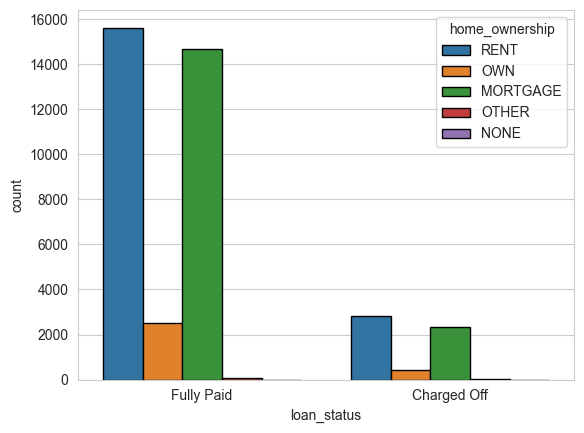

In [87]:
sns.countplot(x='loan_status',hue='home_ownership', data=loan_df1, edgecolor='black')

In [88]:
loan_df1[(loan_df1['loan_status']=='Charged Off') & (loan_df1['home_ownership'].isin(['RENT','MORTGAGE']))].shape[0] / loan_df1[loan_df1['loan_status']=='Charged Off'].shape[0] * 100

91.81963999287115

> 91.81% of the total customers who went Charged Off were living on Rent and Mortgage.

<AxesSubplot: xlabel='loan_status', ylabel='addr_state'>

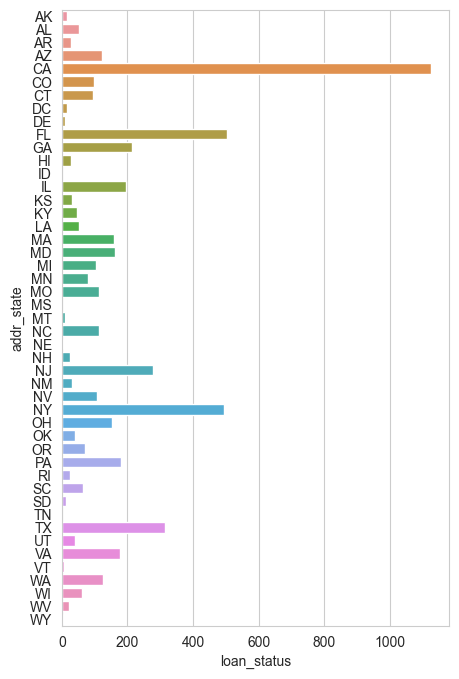

In [89]:
plt.figure(figsize=(5,8))
sns.barplot(y='addr_state', x='loan_status', data=loan_df1[loan_df1['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index())

In [90]:
print('Unique States: {}'.format(loan_df1['addr_state'].nunique()))
loan_df1[(loan_df1['loan_status']=='Charged Off') & (loan_df1['addr_state'].isin(['CA','FL','NY','TX','NJ']))].shape[0] / loan_df1[loan_df1['loan_status']=='Charged Off'].shape[0] * 100

Unique States: 50


48.36927463910177

> 48.36% of the customers who went Charged Off were from 5 States i.e., CA, FL, NY, TX and NJ. Out of which around 20% were from CA

<AxesSubplot: xlabel='loan_status', ylabel='count'>

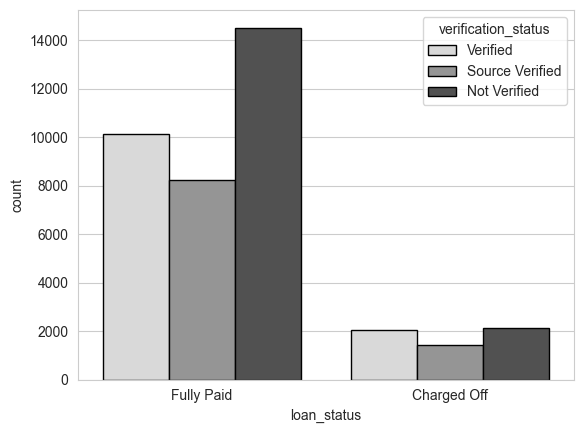

In [91]:
sns.countplot(x='loan_status',hue='verification_status', data=loan_df1, edgecolor='black', palette='Greys')

In [92]:
loan_df1[(loan_df1['loan_status']=='Charged Off') & (loan_df1['verification_status']=='Not Verified')].shape[0] / loan_df1[loan_df1['loan_status']=='Charged Off'].shape[0] * 100

38.05025842095883

> 38% of the customers who went Charged Off were not verified.

In [93]:
loan_df1.groupby('loan_status')['p&l'].sum()

loan_status
Charged Off   -2.761159e+07
Fully Paid     6.939989e+07
Name: p&l, dtype: float64

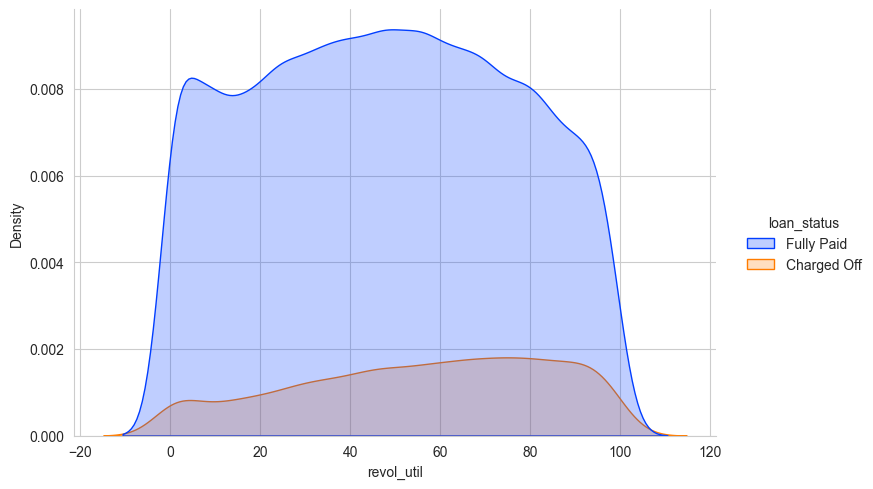

In [94]:
sns.displot(data=loan_df1, x='revol_util', hue='loan_status', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

In [95]:
loan_df1.groupby('loan_status')['open_total_acc'].mean()

loan_status
Charged Off    48.173392
Fully Paid     46.890355
Name: open_total_acc, dtype: float64

<AxesSubplot: xlabel='funded_amnt', ylabel='Density'>

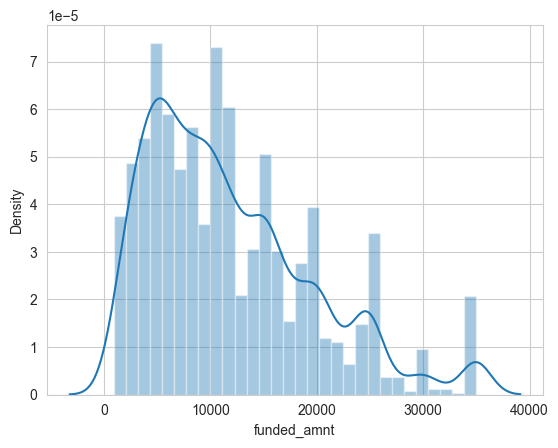

In [96]:
sns.distplot(loan_df1[loan_df1['loan_status']=='Charged Off']['funded_amnt'])

count    5611.000000
mean       13.813317
std         3.653971
min         5.420000
25%        11.280000
50%        13.570000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64


<AxesSubplot: xlabel='int_rate', ylabel='Density'>

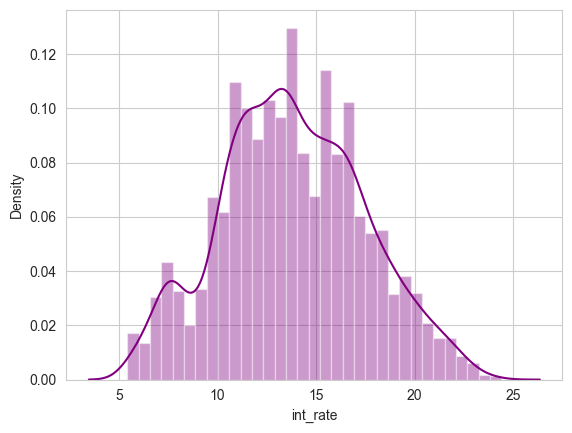

In [97]:
print(loan_df1[loan_df1['loan_status']=='Charged Off']['int_rate'].describe())
sns.distplot(loan_df1[loan_df1['loan_status']=='Charged Off']['int_rate'], color='purple')

# Conclusion

> Customer who have more than 10 years of experience have the highest number of Mortgage

> debt_consolidation is almost equal on the base of employment length as purpose for the loan.

> more than 21600 loans were issued in `2011` hence most of the Charged Off cases were seen in the same Year.

> 38% of the customers who went Charged Off were `not verified`. Means if the customers are `not verified` they could get defaulted.

> 49.22% of the total customers who went Charged Off have stated the purpose for the loan as `Debt Consolidation`. Hence, the customers who states purpose as `Debt Consolidation` are likely to get defaulted.

> annual income of maximum people living on `Rent` and `Mortgage` is less than `1 Lakh`.

> 85.45% of the total Charged Off customers have annual income less than `1 Lakh`. Hence, the customers having annual income is less than `1 Lakh` are most likely to get defaulted.

> 91.81% of the total customers who went Charged Off were living on `Rent` and `Mortgage`. This means the customers living on `Rent` or having `Mortgage` are most likely to get defaulted.

> 48.36% of the customers who went Charged Off were from 5 States i.e., `CA`, `FL`, `NY`, `TX` and `NJ`. Out of which around 20% were from `CA`. People applying for loan from State CA are most likely to be defaulted.